# THE CIFAR - 10 DATASET

In [8]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


The CIFAR-10 dataset deals with image classification, containing 60000 32x32 colour images in 10 classes, with 6000 images per class(CIFAR-10 and CIFAR-100 datasets, n.d.). The classes are airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. This is a single-label multiclass classification problem

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

from keras import backend as k
tf.keras.backend.clear_session() # run this to clear backend before recompiling model

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split data into train and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                                                      test_size=0.1,
                                                      random_state=42)

# Print shape of each set
print("Shape of training set:", x_train.shape)
print("Shape of validation set:", x_valid.shape)
print("Shape of test set:", x_test.shape)


Shape of training set: (45000, 32, 32, 3)
Shape of validation set: (5000, 32, 32, 3)
Shape of test set: (10000, 32, 32, 3)


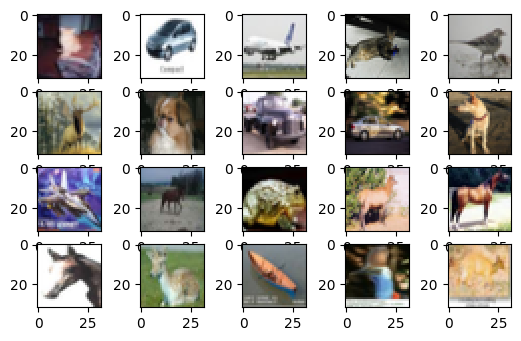

In [12]:
import matplotlib.pyplot as plt

for i in range(20):
    #define subplot
    plt.subplot(5, 5, i+1)
    #plot pixel data
    plt.imshow(x_train[i], cmap=plt.cm.binary)
#diplay the images
plt.show()

In [13]:
import keras
from keras.utils import to_categorical

#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_valid = keras.utils.to_categorical(y_valid, num_category)

In [14]:
#dividing image pixel by 255 so that pixel comes in range 0 to 1...
x_test=x_test/255.0
x_train=x_train/255.0
x_valid=x_valid/255.0

In [15]:
from tensorflow.keras import models, layers, optimizers
# create model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3))) # add a flatten layer
tf.keras.layers.Dense(512,activation='relu')
tf.keras.layers.Dense(256,activation='relu')
tf.keras.layers.Dense(128,activation='relu')
tf.keras.layers.Dense(64,activation='relu')
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
Score = model.fit(x_train, y_train, epochs=64, batch_size=128, verbose=1,
          validation_data=(x_test, y_test))


Epoch 1/64
352/352 [==============================] - 3s 8ms/step - loss: 1.9498 - accuracy: 0.3093 - val_loss: 1.8262 - val_accuracy: 0.3597
Epoch 2/64
352/352 [==============================] - 2s 6ms/step - loss: 1.8359 - accuracy: 0.3579 - val_loss: 1.8429 - val_accuracy: 0.3576
Epoch 3/64
352/352 [==============================] - 3s 8ms/step - loss: 1.7959 - accuracy: 0.3732 - val_loss: 1.8749 - val_accuracy: 0.3490
Epoch 4/64
352/352 [==============================] - 3s 8ms/step - loss: 1.7880 - accuracy: 0.3784 - val_loss: 1.8012 - val_accuracy: 0.3685
Epoch 5/64
352/352 [==============================] - 2s 6ms/step - loss: 1.7649 - accuracy: 0.3872 - val_loss: 1.8231 - val_accuracy: 0.3660
Epoch 6/64
352/352 [==============================] - 2s 6ms/step - loss: 1.7584 - accuracy: 0.3904 - val_loss: 1.7766 - val_accuracy: 0.3749
Epoch 7/64
352/352 [==============================] - 2s 6ms/step - loss: 1.7515 - accuracy: 0.3941 - val_loss: 1.8250 - val_accuracy: 0.3623
Epoch 

In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
# Metrics
y_test_predictions = np.argmax(model.predict(x_test), axis=-1)
sc_rc = recall_score(y_test, y_test_predictions, average='weighted')
sc_f1 = f1_score(y_test, y_test_predictions, average='weighted')

print("=========== METRICS =============")
print("Recall score: %.2f" % (sc_rc * 100))
print("F1 score: %.2f" % (sc_f1 * 100))

313/313 [==============================] - 0s 2ms/step


ValueError: ignored

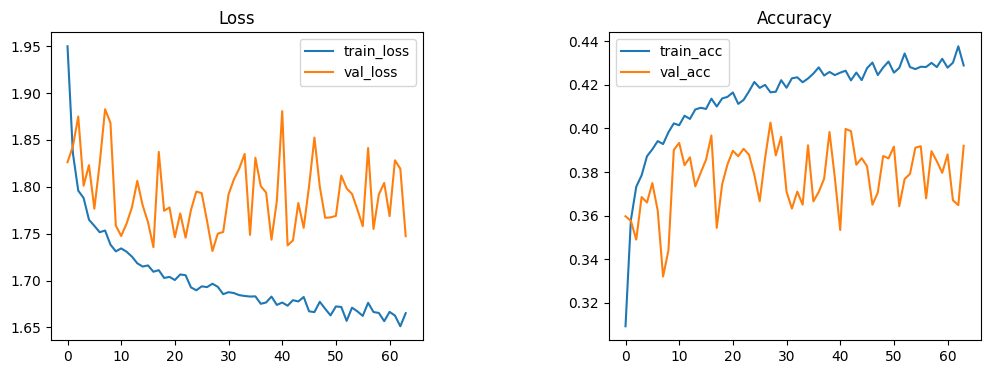

In [19]:
import matplotlib.pyplot as plt

# Lấy ra các giá trị loss và accuracy từ history object
train_loss = Score.history['loss']
val_loss = Score.history['val_loss']
train_acc = Score.history['accuracy']
val_acc = Score.history['val_accuracy']

# Vẽ biểu đồ
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].plot(train_loss, label='train_loss')
ax[0].plot(val_loss, label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='train_acc')
ax[1].plot(val_acc, label='val_acc')
ax[1].set_title('Accuracy')
ax[1].legend()

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.5)

plt.show()
